In [91]:
#Importing required libraries

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [92]:
#Reading the loan.csv file

loan_data = pd.read_csv("loan.csv")

In [93]:
#Reading 1st few lines of data to make sure data is loaded
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [94]:
#Getting the shape of dataset to know the number of rows, cloumns

loan_data.shape

(39717, 111)

In [95]:
#Reading the columns

loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [100]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

# Data cleaning


In [101]:
# Finding the total number of null values in the dataset

loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [102]:
# Identify and drop the columns where all the values are null(NA)

loan_data = loan_data.dropna(axis='columns', how='all')

In [103]:
#Getting the shape of dataset after deleting the null columns

loan_data.shape

(39717, 57)

In [104]:
# Finding the total number of null values in the dataset

loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [105]:
#dropping the column which are not required for case study 

drop_columns = [
'desc', 
'mths_since_last_delinq', 
'mths_since_last_record', 
'next_pymnt_d',
'url',
'initial_list_status',
'application_type', 
'emp_title',  
'last_pymnt_d', 
'tax_liens',
'pymnt_plan',
'title',
'zip_code',
'collections_12_mths_ex_med',
'policy_code',
'acc_now_delinq',
'chargeoff_within_12_mths',
'delinq_amnt'
]

loan_data = loan_data.drop(drop_columns, axis=1)

In [106]:
#dropping the loan_status records for the Current values as they are not required for analysis

loan_data = loan_data[loan_data.loan_status != "Current"]

# Standardising Values

In [107]:
#update column names to standard names

def update_columns(old_column, new_column):
    loan_data.rename(columns = {old_column:new_column}, inplace = True)

update_columns('term','term in months')
update_columns('revol_util','revol_util in %')
update_columns('int_rate','int_rate in %')

In [108]:
#updating the values and data types to standards


loan_data['revol_util in %'] = loan_data['revol_util in %'].replace('%', '', regex=True).astype(float)
loan_data['term in months'] = loan_data['term in months'].replace(' months', '', regex=True).astype('int32')
loan_data['int_rate in %'] = loan_data['int_rate in %'].replace('%', '', regex=True).astype(float)

In [109]:
#Reset the index

loan_data.reset_index(inplace=True,drop=True)

# Data analysis

#  Univariate Analysis

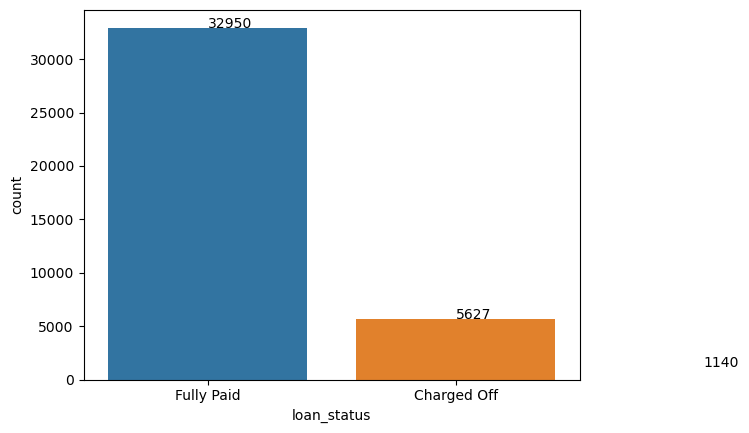

In [111]:
# finding the count of members for each loan status


members_count = sns.countplot(x='loan_status', data=loan_data)

val = loan_data.loan_status.value_counts()
for i, v in s.reset_index().iterrows():
    members_count.text(i, v.loan_status ,v.loan_status, color='k')

In [124]:
#Finding the mean, median, quartile range of annual income

loan_data.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [213]:
#Adding a new column called monthly income

loan_data['monthly_income'] = loan_data['annual_inc']/12

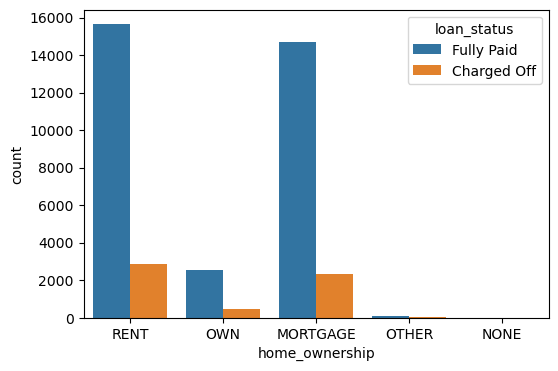

In [165]:
#finding home ownership 

fig, ax = plt.subplots(figsize = (6,4))

sns.countplot(x='home_ownership', data=loan_data, hue='loan_status')
plt.show()

#we can observe here that most of the Charged off members are having home ownership as RENT, MORTAGAGE

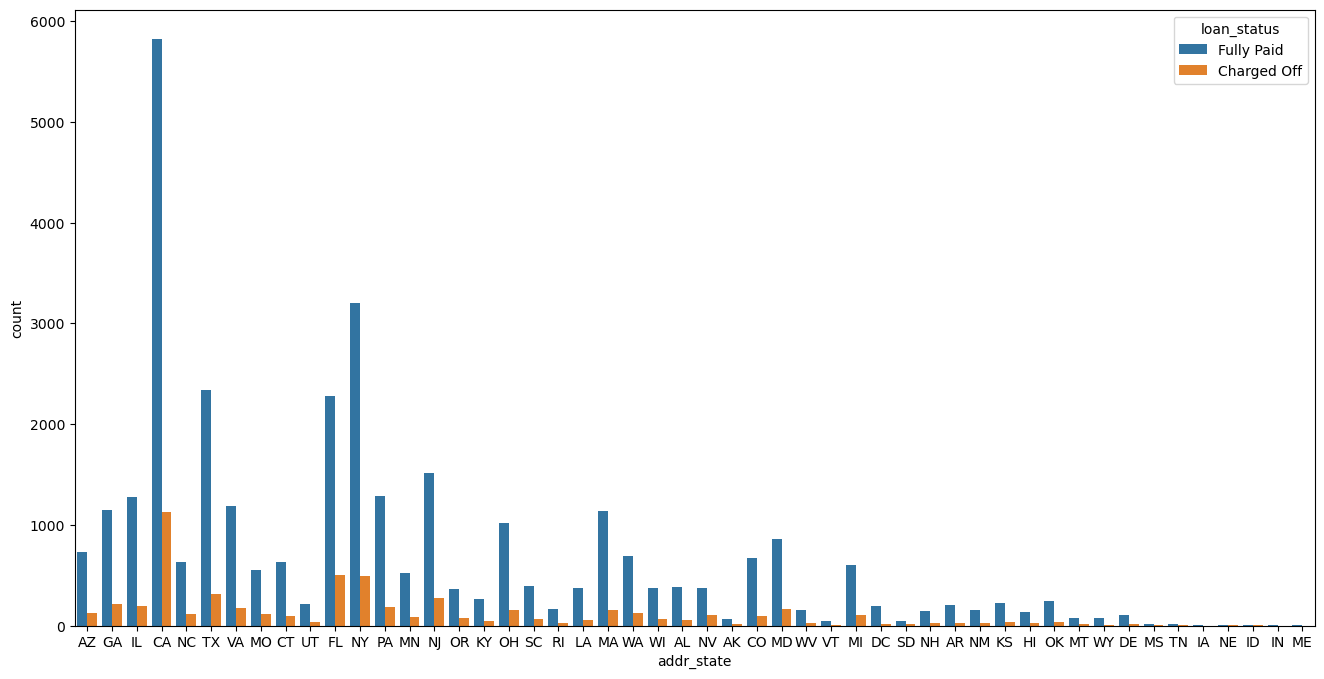

In [220]:
fig, ax = plt.subplots(figsize = (16,8))

sns.countplot(x='addr_state', data=loan_data, hue='loan_status')
plt.show()

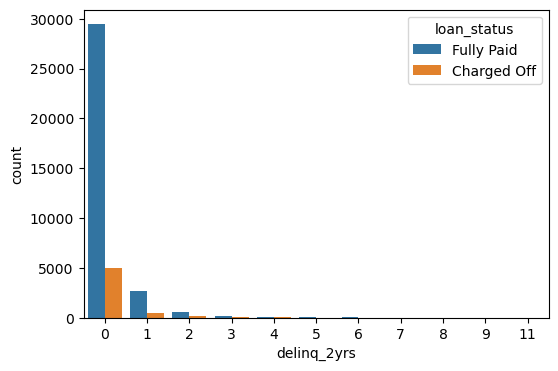

In [166]:
#Finding the delinquency in 2 years

fig, ax = plt.subplots(figsize = (6,4))

sns.countplot(x='delinq_2yrs', data=loan_data, hue='loan_status')
plt.show()

#We can observe here that most of the Charged off people's delinquency in 2 years is almost 0

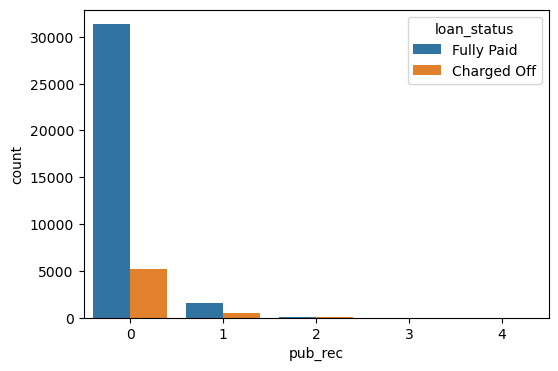

In [168]:
#loan_data[loan_data['loan_status'] == 'Charged Off'].pub_rec.value_counts()

fig, ax = plt.subplots(figsize = (6,4))

sns.countplot(x='pub_rec', data=loan_data, hue='loan_status')
plt.show()


#We can observe here that most of the Charged off people's public record is almost 0

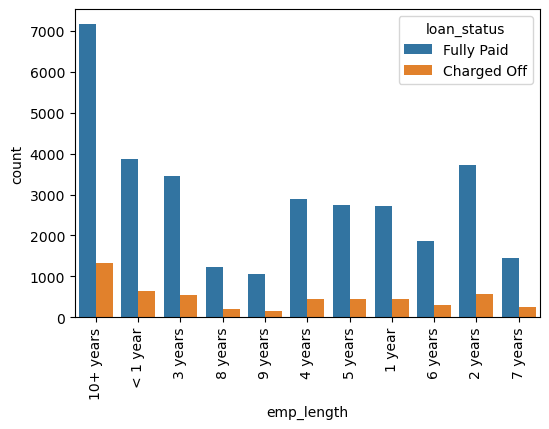

In [170]:
#Finding the employee length

fig, ax = plt.subplots(figsize = (6,4))

sns.countplot(x='emp_length', data=loan_data, hue='loan_status')
plt.xticks(rotation=90)
plt.show()


#We can observe here that most of the Charged off people's employee length is 10+ years

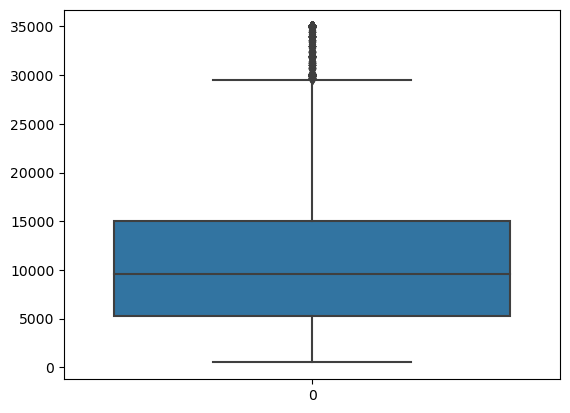

In [144]:
sns.boxplot(loan_data.loan_amnt)
plt.show()

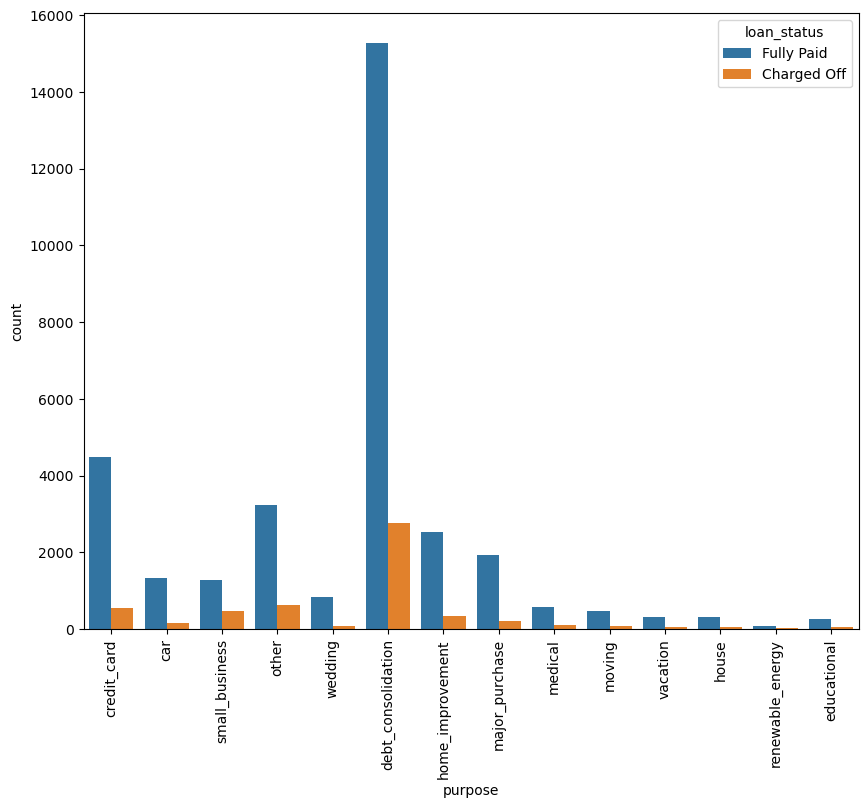

In [218]:
#Finding the purpose of the loan

fig, ax = plt.subplots(figsize = (10,8))

sns.countplot(x ='purpose', data=loan_data, hue='loan_status')
plt.xticks(rotation=90)
plt.show()

#We can see that most of the people taken loan to clear other debts and most of the charged off members also from same category

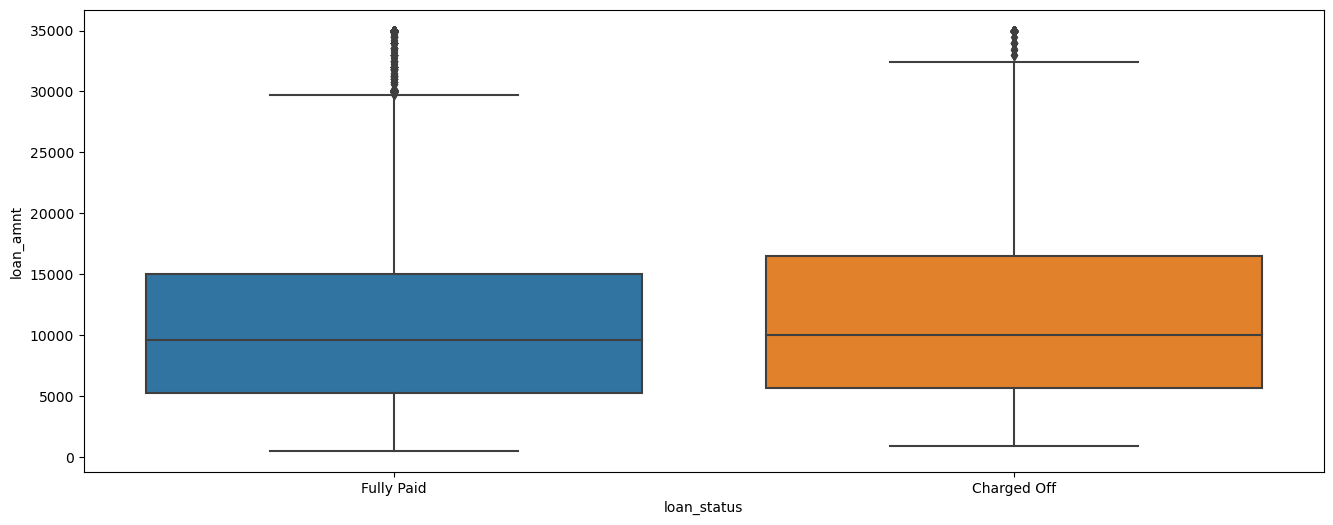

In [153]:
# We can see that members who took high loan amount are charged off

plt.figure(figsize=(16, 6))

sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_data)
plt.show()

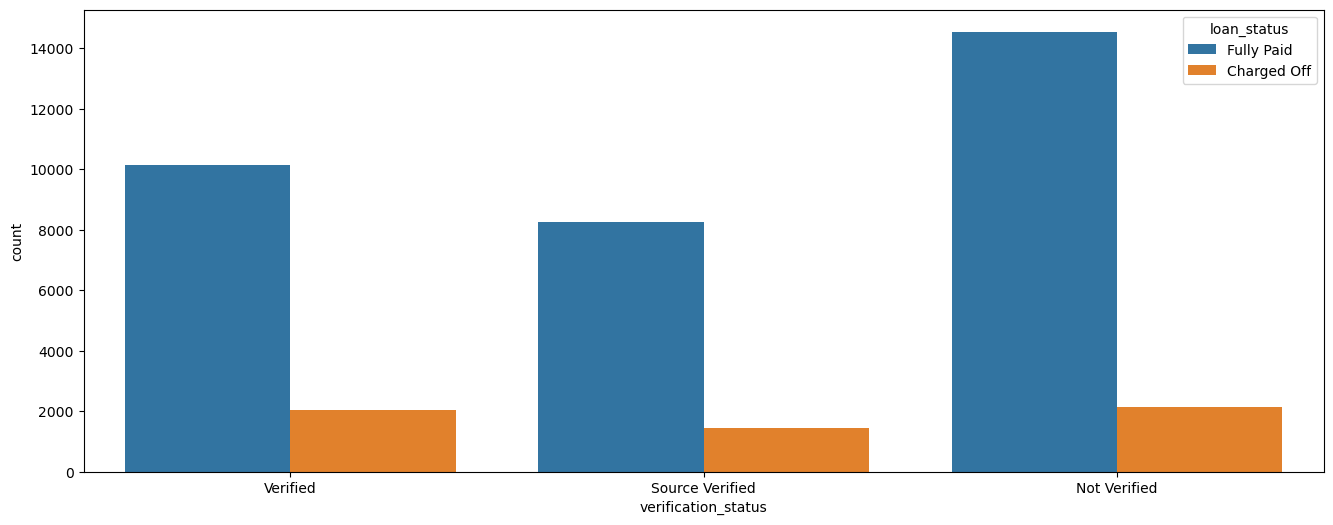

In [216]:
#Analysing the home verification status

plt.figure(figsize=(16, 6))
sns.countplot(x='verification_status', data=loan_data, hue='loan_status')
plt.show()

#We can see that most of the charged off member's source isn't verified

# Bivariate analysis

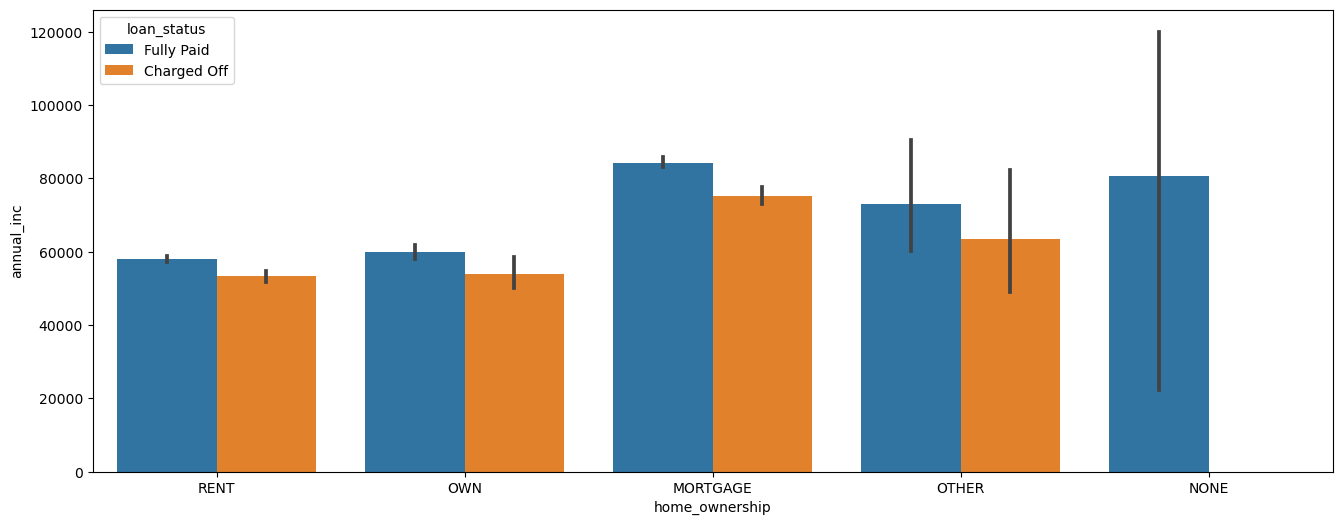

In [164]:
#Analysing the Home ownership relationship with Annual income 

plt.figure(figsize=(16,6))
sns.barplot(x='home_ownership', y='annual_inc', data =loan_data, hue ='loan_status')
plt.show()

#We can observe that most of the charged off people's home ownership as MORTAGAGE and annual income is between 70k to 80k

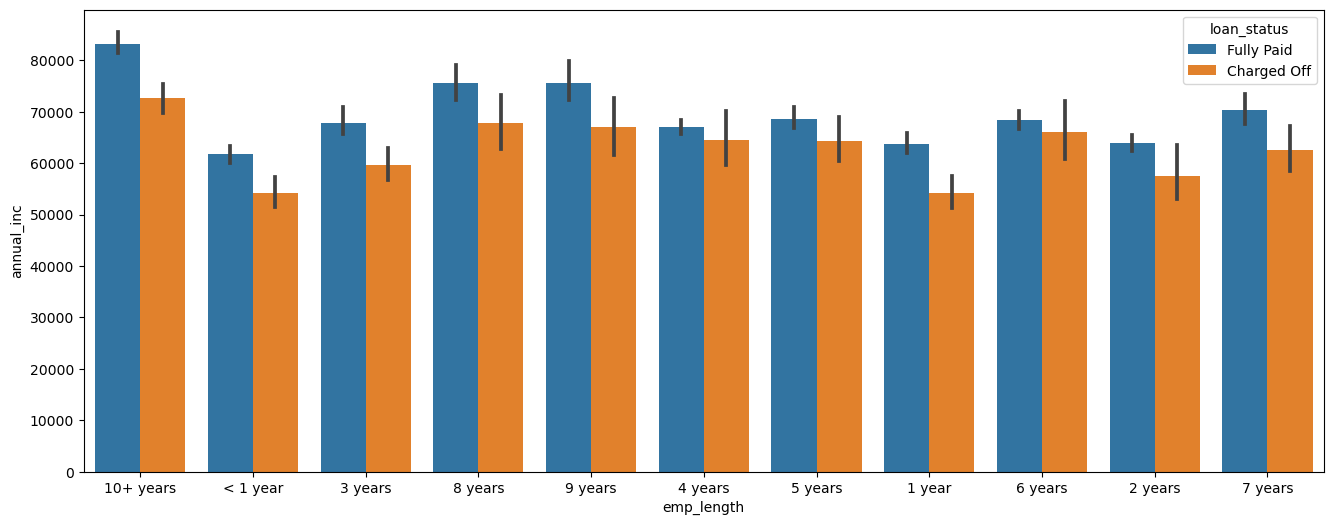

In [198]:
#Finding the relationship between annual income and employee length

plt.figure(figsize=(16,6))
sns.barplot(x='emp_length', y='annual_inc', data =loan_data, hue ='loan_status')
plt.show()

#We can observe that most of the charged off people are having emp length more than 10 years and whose annual salary close to 70k

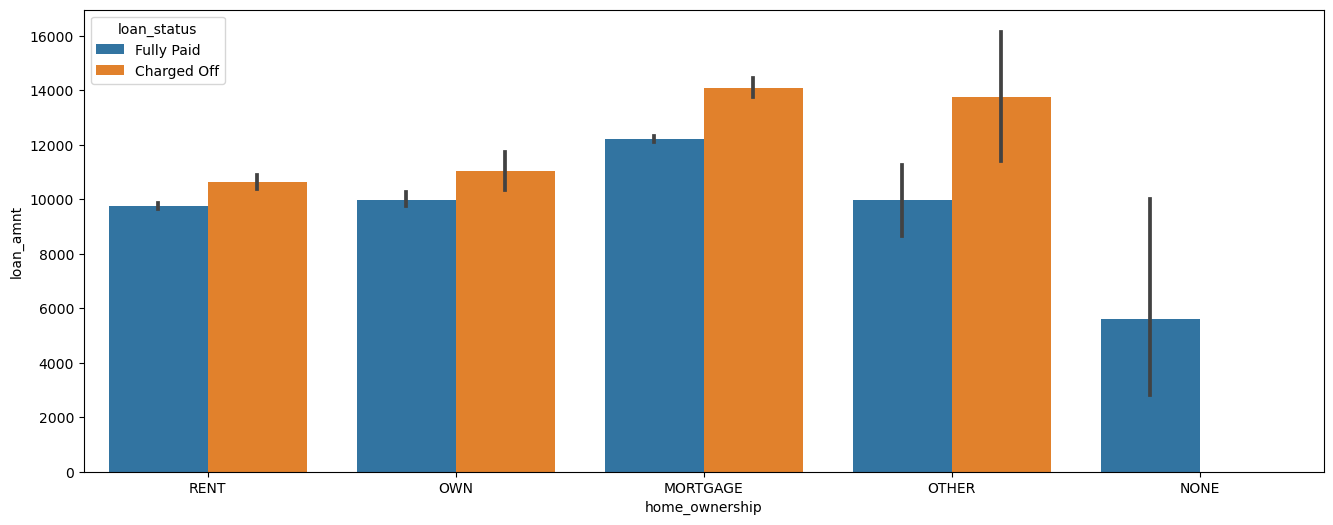

In [202]:
#Finding the relationship between home ownership and loan amount

plt.figure(figsize=(16,6))
sns.barplot(data =loan_data,x='home_ownership', y='loan_amnt', hue ='loan_status')
plt.show()

#We can observe that most of the charged off people are having loan amount is close to 14k and whose home ownership as MORTAGE and OTHER

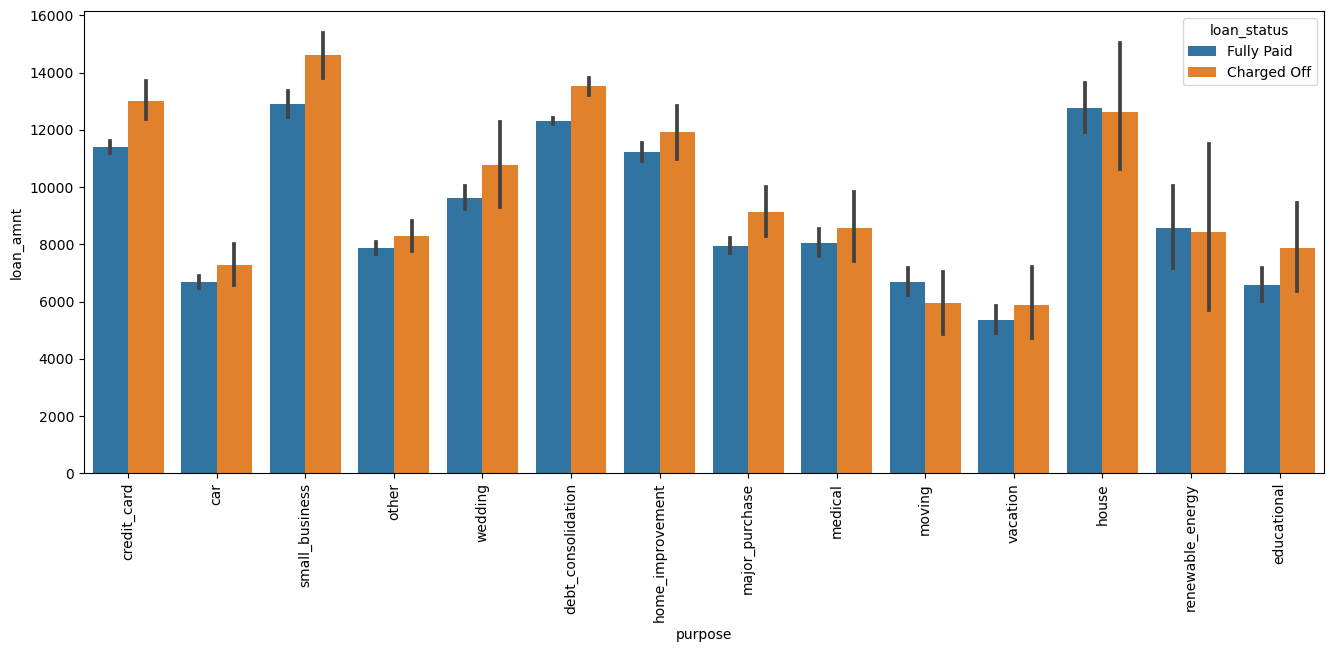

In [205]:
#Finding the relationship between Purpose and loan amount

plt.figure(figsize=(16,6))
sns.barplot(data =loan_data,x='purpose', y='loan_amnt', hue ='loan_status')
plt.xticks(rotation=90)
plt.show()

# 

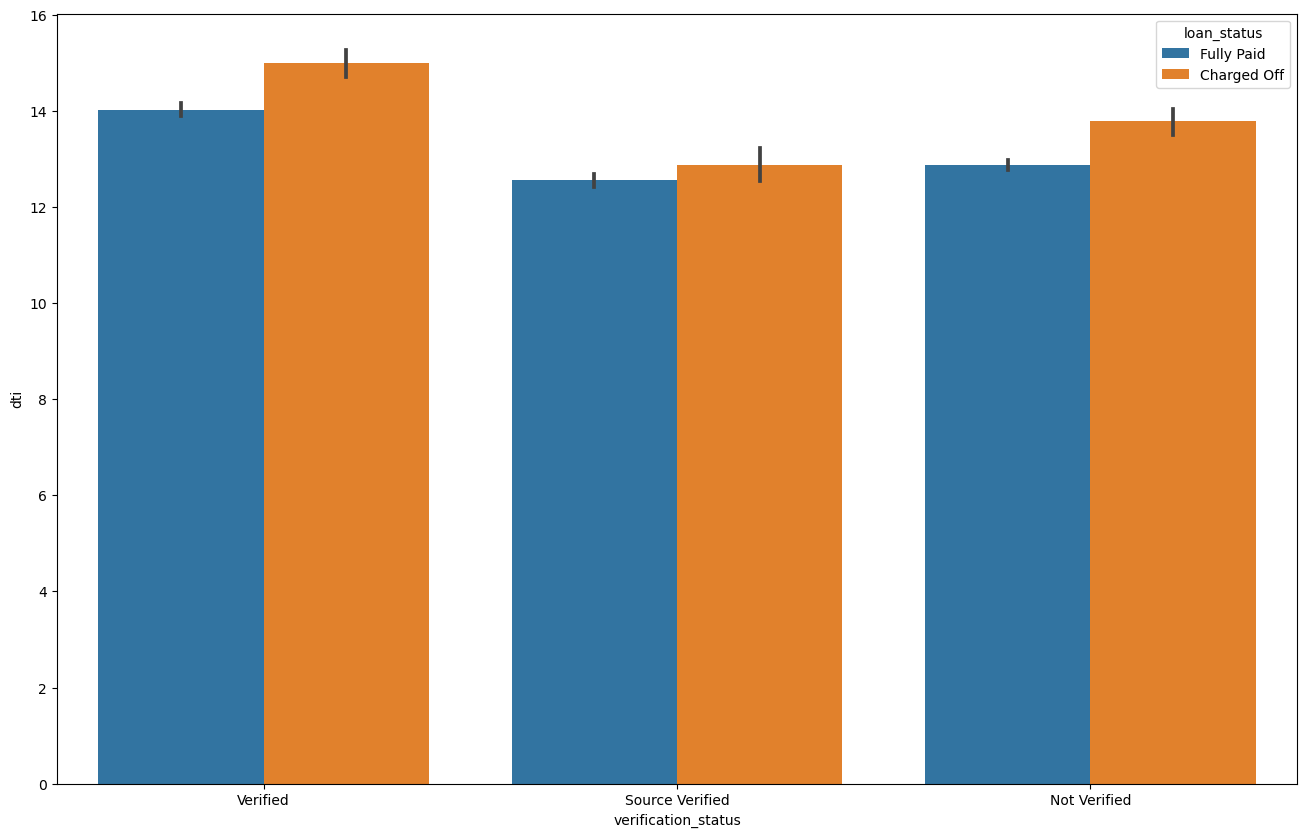

In [208]:
#Finding the relationship between verification status and dti

plt.figure(figsize=(16,10))
sns.barplot(data=loan_data,x='verification_status',y='dti',hue='loan_status')
plt.show()

#We can observe that most of the charged off members who are verified and their DTI is more than close to 15

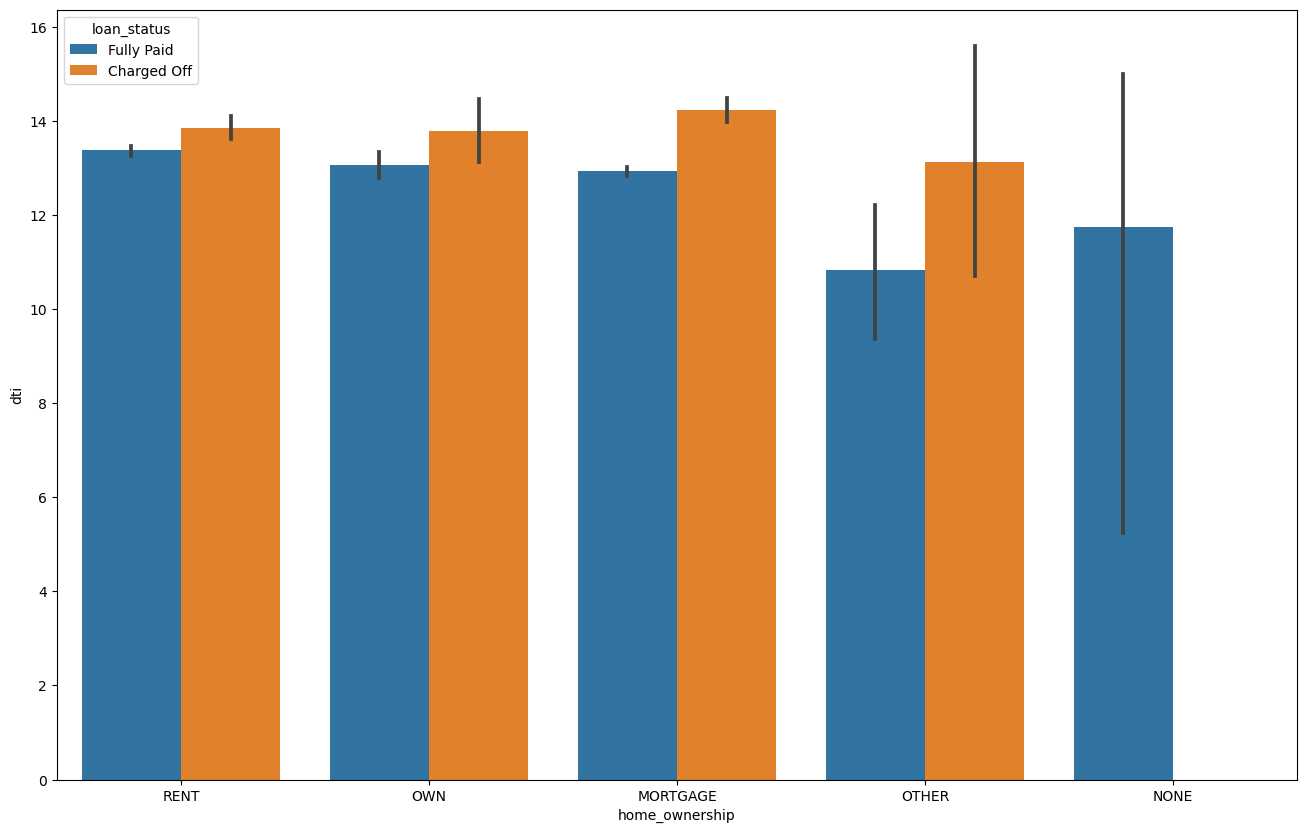

In [209]:
#Finding the relationship between home ownership status and dti

plt.figure(figsize=(16,10))
sns.barplot(data=loan_data,x='home_ownership',y='dti',hue='loan_status')
plt.show()

#We can observe that most of the charged off members who's home ownership is RENT, MORTAGAGE and their DTI is more than close to 14

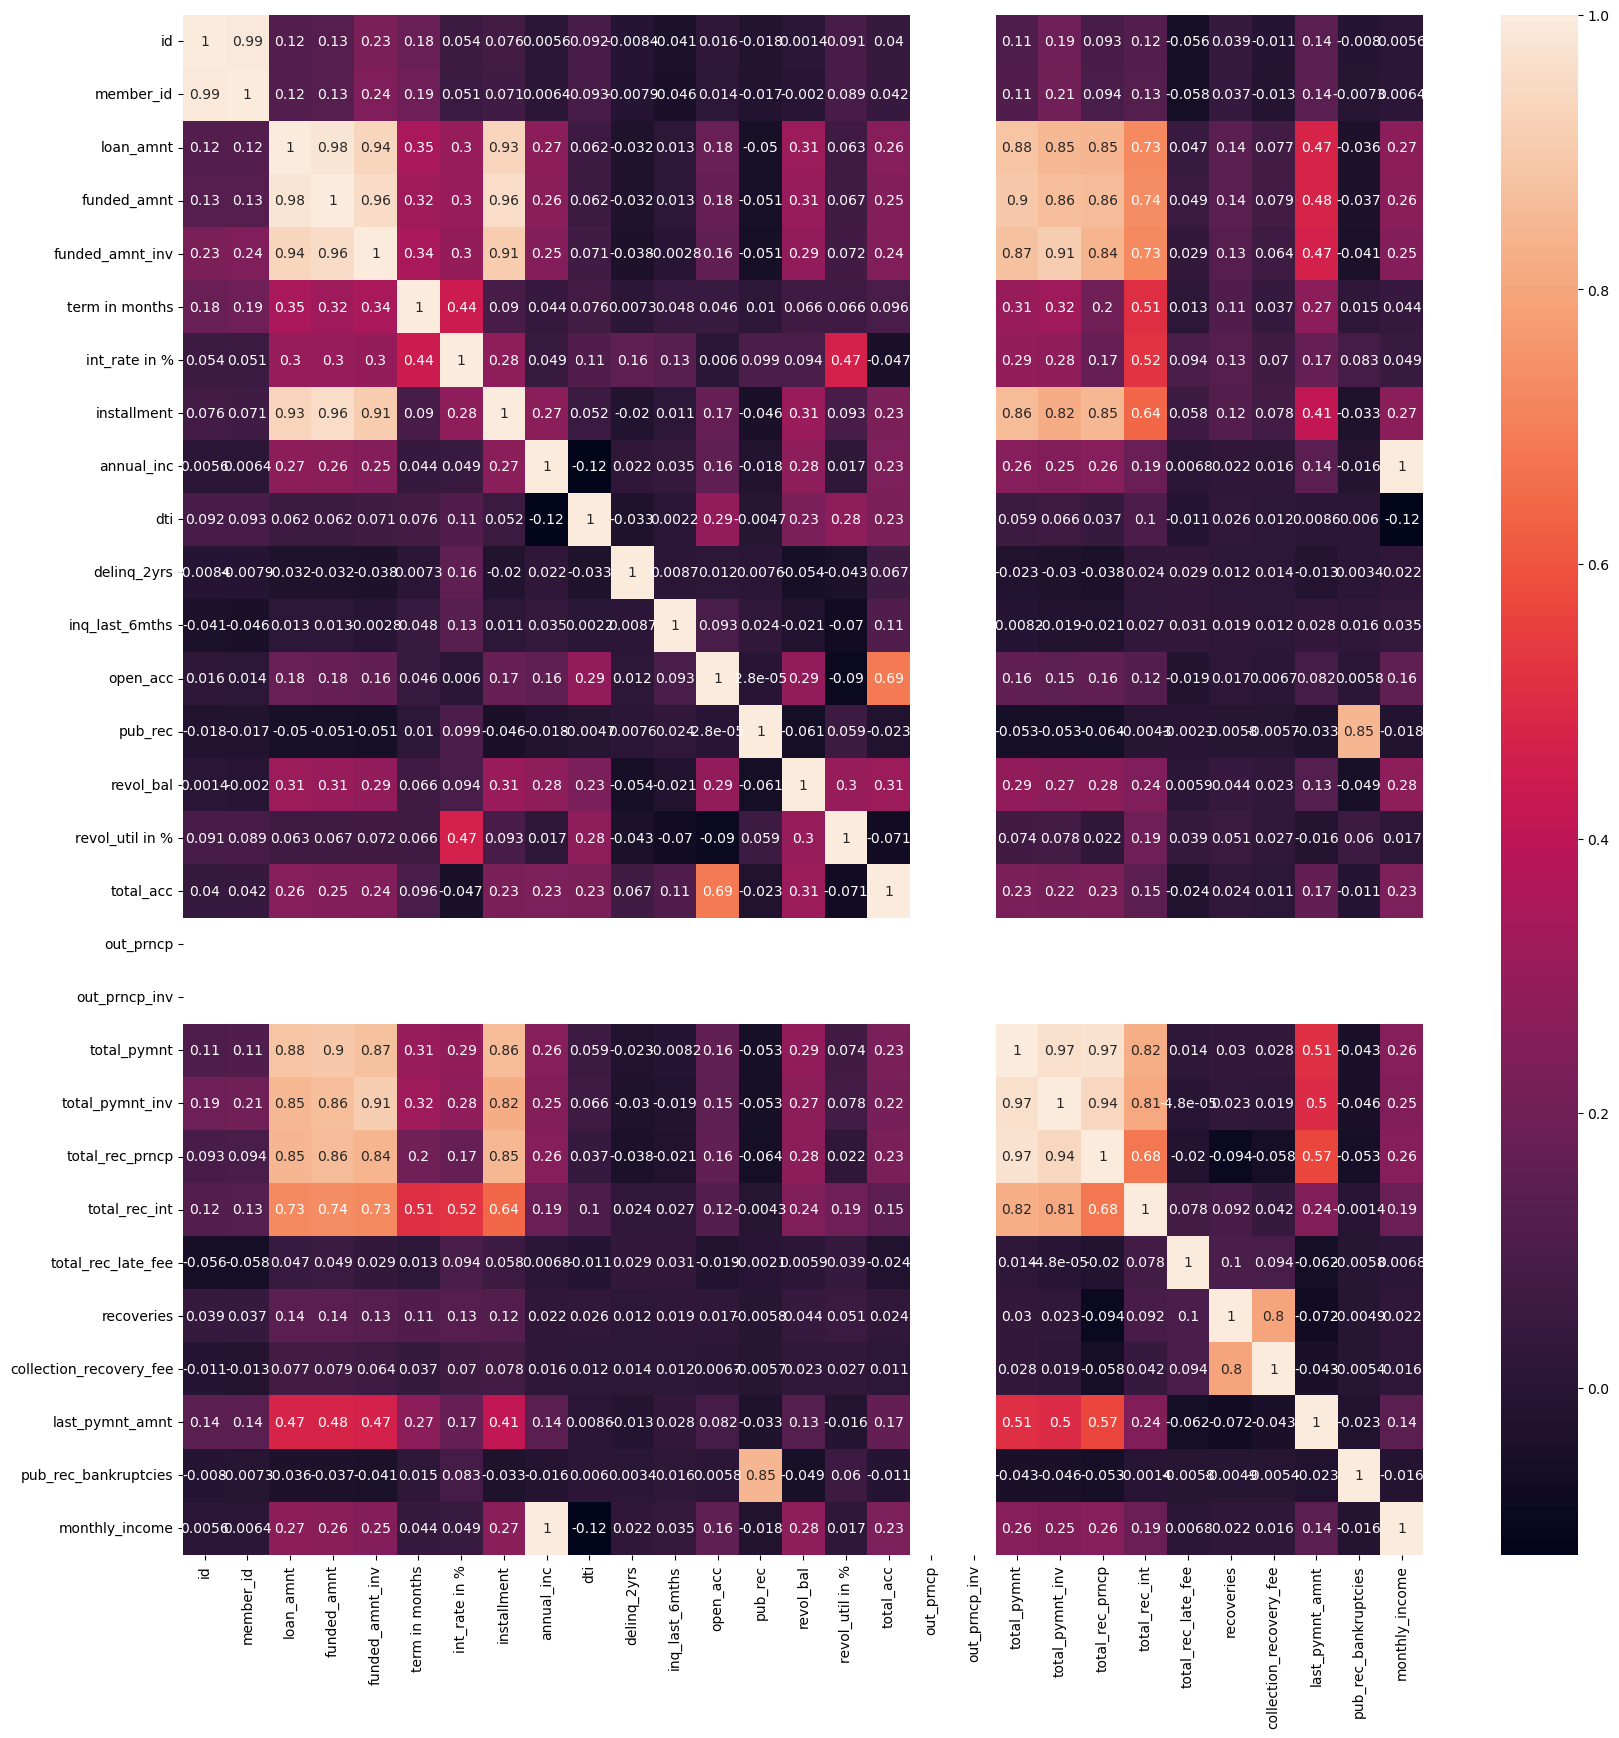

In [211]:
#corelation of variables

plt.figure(figsize=(20,20))
sns.heatmap(loan_data.corr(),annot=True)
plt.show()